Sample size: 569
Number of features: 30
Training set size: 455
Testing set size: 114
Score: 0.9736842105263158
Confusion Matrix:
 [[40  3]
 [ 0 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Cross Validation Scores: [0.96491228 0.9122807  0.94736842 0.89473684 0.96491228 0.94736842
 0.96491228 0.89473684 0.96491228 0.92857143]


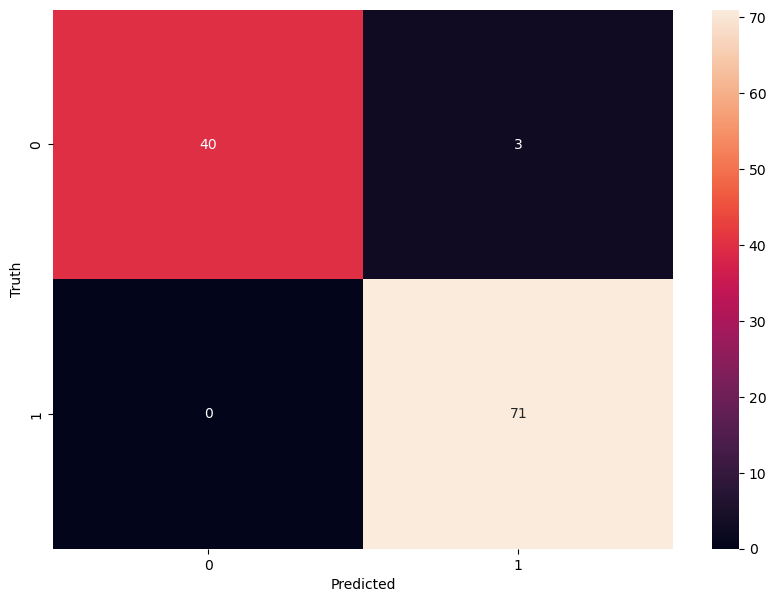

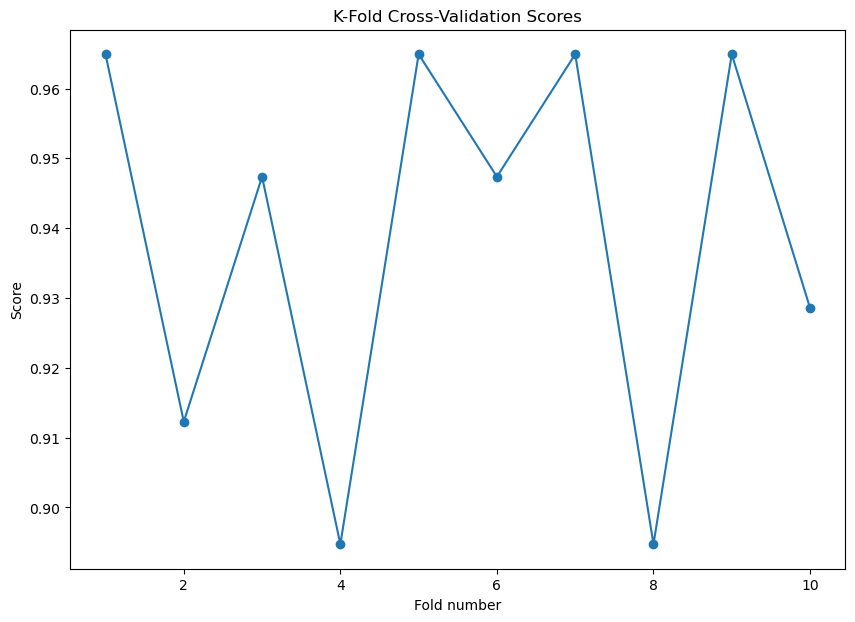

GaussianNB Score: 0.9736842105263158
KNeighborsClassifier Score: 0.956140350877193
LogisticRegression Score: 0.956140350877193
SVC Score: 0.9473684210526315


In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


breast_cancer = load_breast_cancer()


print("Sample size:", breast_cancer.data.shape[0])
print("Number of features:", breast_cancer.data.shape[1])


X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


nb = GaussianNB()


nb.fit(X_train, y_train)


predictions = nb.predict(X_test)

score = nb.score(X_test, y_test)
print("Score:", score)

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, predictions)
print("Classification Report:\n", cr)


plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
print("Cross Validation Scores:", scores)

plt.figure(figsize=(10,7))
plt.plot(np.arange(1, len(scores) + 1), scores, marker='o')
plt.xlabel('Fold number')
plt.ylabel('Score')
plt.title('K-Fold Cross-Validation Scores')
plt.show()

estimators = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)
    score = estimator.score(X_test, y_test)
    print(f'{name} Score: {score}')
